The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


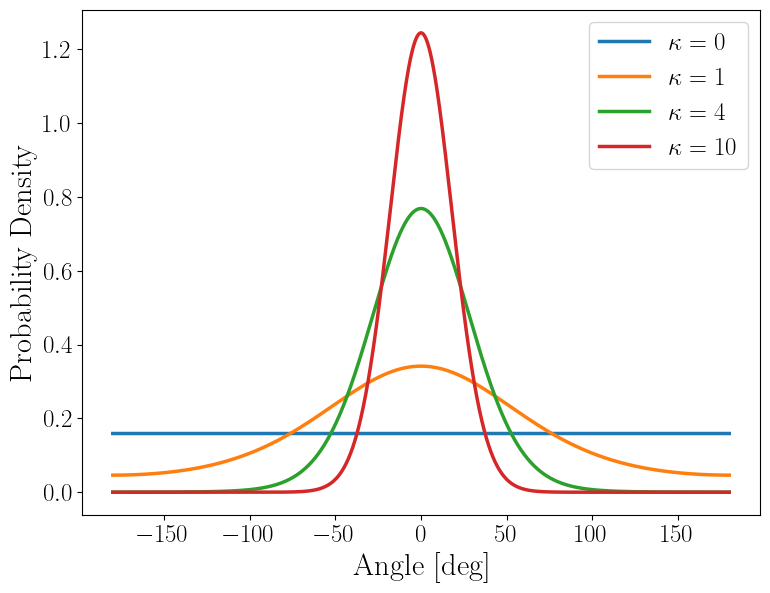

In [4]:
%load_ext autoreload
%autoreload 2

from typing import List
import scipy as scp
import numpy as np
import matplotlib.pyplot as plt

from src.utils.save_utils import SafeOpen
from src.utils.plot_utils import set_rc_params


SINGLE_COLUMN_WIDTH = 2.5 * 3.5


def plot_von_mises(
    mean: float,
    concentrations: List[float],
    n_points: int = 10000,
    angles_in_degrees: bool = True
):
    concentrations = np.array(concentrations, dtype=np.float32)
    x = np.linspace(-np.pi, np.pi, n_points, endpoint=True) - mean
    if angles_in_degrees:
        x_axis = x * (180 / np.pi)
    else:
        x_axis = x
    x_label = "Angle " + ("[deg]" if angles_in_degrees else "[rad]")
    pdfs = scp.stats.vonmises.pdf(
        loc=np.repeat(mean, concentrations.shape).reshape(-1, 1),
        kappa=concentrations.reshape(-1, 1),
        x=x
    )
    # Scipy does not include the uniform case for kappa = 0
    mask_uniform = (concentrations == 0.0)
    pdfs[mask_uniform, :] = 1 / (2 * np.pi)
    y_label = "Probability Density"
    
    set_rc_params()
    fig, ax = plt.subplots()
    fig.set_size_inches(SINGLE_COLUMN_WIDTH, SINGLE_COLUMN_WIDTH * 0.75)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    for con, y in zip(concentrations, pdfs):
        ax.plot(x_axis, y, lw=2.5, label=fr"$\kappa = {con:.0f}$")
    ax.legend()
    
    # Save plot
    with SafeOpen(
        "./saved_plots/",
        f"von_mises_pdf.png",
        "wb",
        overwrite=True
    ) as file:
        fig.savefig(file, dpi=300)



N_POINTS = 10000

plot_von_mises(
    mean=0,
    concentrations=[0, 1, 4, 10],
    n_points=N_POINTS,
    angles_in_degrees=True
)

    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


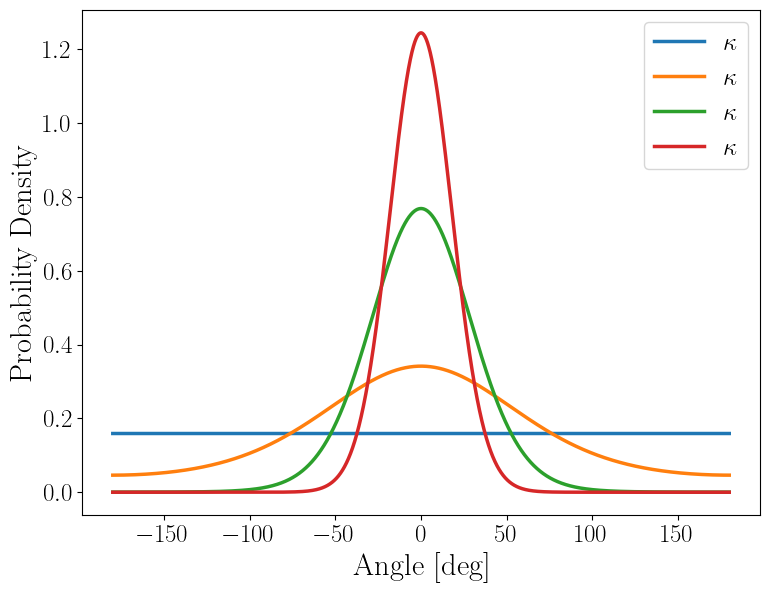